In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
from pandas import set_option
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as md
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sklearn
import statsmodels as stm
import patsy

In [2]:
data = pd.read_csv('allcars.csv', index_col=0)
data.head()

/home/josephvergel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/josephvergel/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
0,2017-10-31 18:45:59.000000,0,ffb0fd700220fff43fffe74808e73e03f33400ef33fbe1...,2.2,14.48,NaN,NaN,44.313725,NaN,NaN,0.0,0.0,903.0,4.0,NaN,15.686275,1
1,2017-10-31 18:46:00.000000,0,00b0fda802e804e14104ed3d01ee3a08ec4c04f738fbd5...,3.7,14.48,NaN,NaN,35.294118,NaN,NaN,0.0,0.0,938.0,6.0,NaN,15.294118,1
2,2017-10-31 18:46:01.000000,0,00f0fe5002b0fdea4009e33c01ed3701ec4100f53b05e8...,3.9,14.54,NaN,NaN,29.411765,NaN,NaN,0.0,0.0,1044.5,7.0,NaN,14.901961,1
3,2017-10-31 18:46:02.000000,0,0120fdc0028804e03c10de3a09e8400ce43b0ae63b01f4...,3.9,14.56,NaN,NaN,53.725490,NaN,NaN,0.0,0.0,1102.0,7.0,NaN,17.647059,1
4,2017-10-31 18:46:03.000000,0,00a0fde802d816e0370ae73604e23b04e53900e542ffea...,4.7,14.48,NaN,NaN,75.686275,NaN,NaN,0.0,0.0,1626.5,10.0,NaN,23.529412,1


In [3]:
def feature_subplots(df, title):
    df.plot(subplots=True, layout=(20,1),lw= 1.6,figsize=(16, 24),sharex=True, title=title)

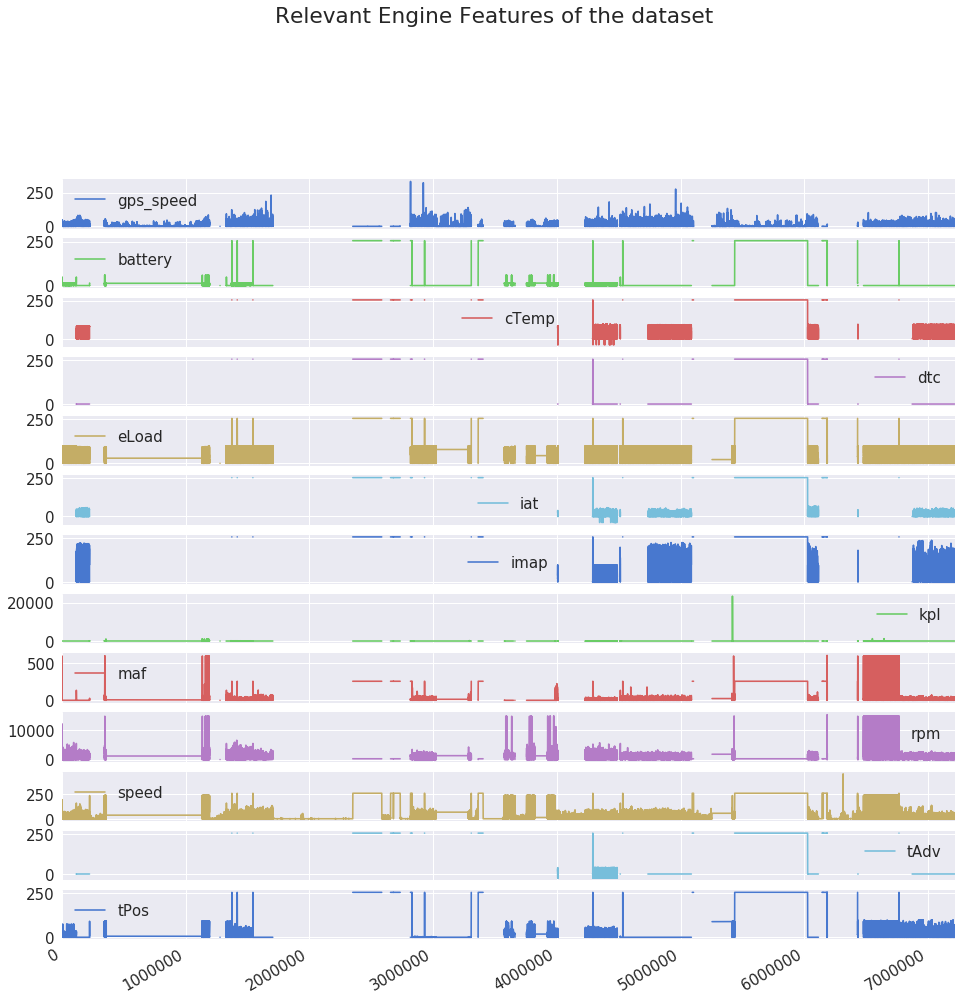

In [5]:
data2 = data
data2.index = np.arange(0,len(data))
feature_subplots(data2.drop(['tripID','timeStamp','accData','deviceID'],axis=1),'Relevant Engine Features of the dataset')
plt.savefig('allcars_relevant_features.png', format = 'png', dpi=300)

In [6]:
train = data2[7000000::]

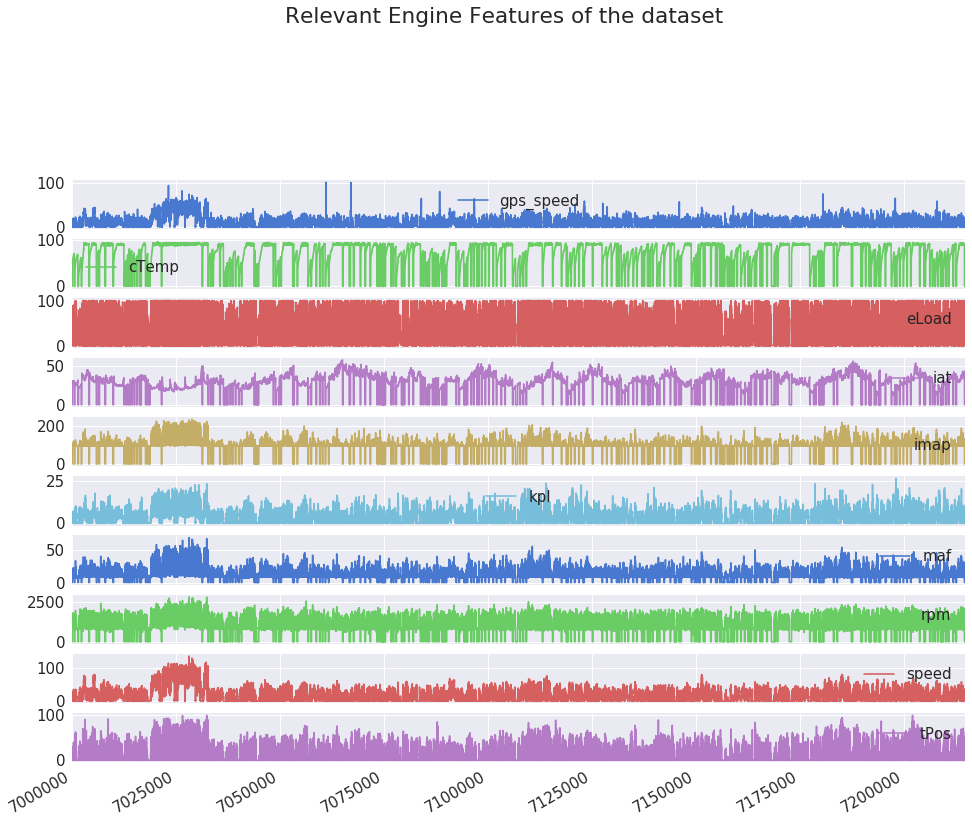

In [7]:
feature_subplots(train.drop(['dtc','battery','tAdv','tripID','timeStamp','accData','deviceID'],axis=1),'Relevant Engine Features of the dataset')
plt.savefig('train.png', format = 'png', dpi=300)

In [8]:
print(train.shape)
print(train['deviceID'].unique())
print(len(train.tripID.unique()))

(214695, 17)
[53]
295


In [30]:
writer = pd.ExcelWriter('almost_continuous.xlsx')
train.to_excel(writer, 'Sheet1')
writer.save()

train.to_csv(almost_continuous)